In [2]:
import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import os
import struct

In [3]:
np.random.seed(7)

In [5]:
    dir_name = "/Users/bipin/Downloads/archive (11)"
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
    print("Loading matlab data of SVHN")
    mat1 = loadmat("/Users/bipin/Downloads/archive (11)/train_32x32.mat")
    train_dataset = mat1['X']
    print( "Program done!")
    

Loading matlab data of SVHN
Program done!


In [7]:
dir_name = "/Users/bipin/Downloads/archive (11)"
if not os.path.isdir(dir_name):
    os.mkdir(dir_name)
print("Loading matlab data of SVHN")
mat2 = loadmat("/Users/bipin/Downloads/archive (11)/test_32x32.mat")
test_dataset = mat2['X']
print( "Program done!")

Loading matlab data of SVHN
Program done!


In [8]:
train_images = np.array(mat1['X'])
test_images = np.array(mat2['X'])

train_labels = mat1['y']
test_labels = mat2['y']

In [9]:
print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)


In [10]:
train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

print(train_images.shape)
print(test_images.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


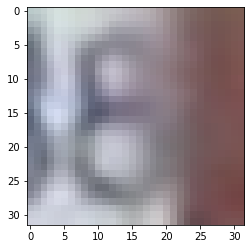

In [11]:
plt.imshow(train_images[67])
plt.show()

In [12]:
# Convert train and test images into 'float64' type

train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

In [13]:
# Convert train and test labels into 'int64' type

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

In [14]:
# Normalization

print('Min: {}, Max: {}'.format(train_images.min(), train_images.max()))

train_images /= 255.0
test_images /= 255.0

Min: 0.0, Max: 255.0


In [17]:
# One-hot encoding of train and test labels

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,test_size=0.2, random_state=5)

In [19]:
y_val.shape

(14652, 10)

In [29]:
# Data augmentation

datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [22]:
keras.backend.clear_session()

aux_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])

lr_schedule = keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))
optimizer = keras.optimizers.Adam(learning_rate=1e-4, amsgrad=True)
aux_model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [23]:
# Fit model in order to determine best learning rate

history = aux_model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=30, validation_data=(X_val, y_val),
                              callbacks=[lr_schedule])

/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
458/458 [==============================] - 151s 301ms/step - loss: 2.4583 - accuracy: 0.1558 - val_loss: 2.2226 - val_accuracy: 0.1915
Epoch 2/30
458/458 [==============================] - 136s 296ms/step - loss: 2.2006 - accuracy: 0.1973 - val_loss: 1.8869 - val_accuracy: 0.3180
Epoch 3/30
458/458 [==============================] - 136s 297ms/step - loss: 1.8431 - accuracy: 0.3433 - val_loss: 0.8579 - val_accuracy: 0.7432
Epoch 4/30
458/458 [==============================] - 135s 294ms/step - loss: 1.1525 - accuracy: 0.6188 - val_loss: 0.5630 - val_accuracy: 0.8308
Epoch 5/30
458/458 [==============================] - 136s 298ms/step - loss: 0.8450 - accuracy: 0.7289 - val_loss: 0.4294 - val_accuracy: 0.8756
Epoch 6/30
458/458 [==============================] - 136s 297ms/step - loss: 0.6890 - accuracy: 0.7860 - val_loss: 0.3801 - val_accuracy: 0.8877
Epoch 7/30
458/458 [==============================] - 137s 300ms/step - loss: 0.5802 - accuracy: 0.8232 - val_loss: 0.3445 -

In [24]:
keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(learning_rate=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5', 
                   save_best_only=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [30]:
output= model.fit(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=50, validation_data=(X_val, y_val),
                              )

Epoch 1/50
458/458 [==============================] - 158s 345ms/step - loss: 0.5347 - accuracy: 0.8420 - val_loss: 0.3798 - val_accuracy: 0.8874
Epoch 2/50
458/458 [==============================] - 169s 369ms/step - loss: 0.4235 - accuracy: 0.8770 - val_loss: 0.3012 - val_accuracy: 0.9193
Epoch 3/50
458/458 [==============================] - 161s 352ms/step - loss: 0.3688 - accuracy: 0.8958 - val_loss: 0.3104 - val_accuracy: 0.9133
Epoch 4/50
458/458 [==============================] - 164s 359ms/step - loss: 0.3440 - accuracy: 0.9020 - val_loss: 0.2751 - val_accuracy: 0.9272
Epoch 5/50
458/458 [==============================] - 164s 358ms/step - loss: 0.3205 - accuracy: 0.9090 - val_loss: 0.2578 - val_accuracy: 0.9307
Epoch 6/50
458/458 [==============================] - 166s 363ms/step - loss: 0.3047 - accuracy: 0.9139 - val_loss: 0.2598 - val_accuracy: 0.9339
Epoch 7/50
458/458 [==============================] - 167s 364ms/step - loss: 0.2919 - accuracy: 0.9161 - val_loss: 0.2807 -

In [31]:

test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)
print("test loss = ",test_loss)
print("test acc = ",test_acc)

814/814 [==============================] - 15s 18ms/step - loss: 0.1737 - accuracy: 0.9623
test loss =  0.17367669939994812
test acc =  0.9622771739959717


In [33]:
y_pred=model.predict(X_val)

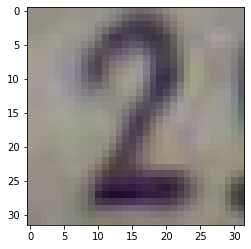

In [44]:
plt.imshow(X_val[14000])

In [47]:
y_pred[14000]

array([6.0160676e-07, 9.9998939e-01, 1.7415880e-07, 9.7951634e-06,
       4.8404228e-08, 1.1638361e-10, 4.5710962e-08, 4.3885557e-09,
       3.5096290e-09, 1.0511315e-10], dtype=float32)